## Optimizing Vehicle Fuel Efficiency: Predictive Modeling of MPG(Miles Per Gallon)

##### By: Yordanos Simegnew Muche

##### Abstract

This project delves into a comprehensive linear regression analysis of a dataset focusing on vehicle miles per gallon (MPG). The methodology encompasses a structured approach, beginning with data preprocessing steps such as standardizing column names, handling missing values, and addressing outliers. Following data preparation, an exploratory data analysis (EDA) is conducted, comprising univariate, bivariate, and multivariate analyses to gain insights into the relationships between variables. 

Subsequently, a linear regression model is trained on the dataset to predict MPG values, followed by model evaluation and visualization. The evaluation highlights the model's goodness of fit, as indicated by an (R^2) value of 0.821, signifying a strong correlation between predicted and actual MPG values. 

The scatter plot depicting actual versus predicted values illustrates a tight clustering around the diagonal line, indicating accurate predictions overall. However, analysis of residuals reveals outliers that warrant further investigation to refine model performance. Despite the model's effectiveness, opportunities for enhancement are identified, including fine-tuning, feature engineering, or exploring more complex models. 

Overall, this study provides valuable insights into the predictive capabilities of linear regression in the context of vehicle MPG, offering implications for improving fuel efficiency and informing decision-making in the automotive industry.

##### Project outline

1. Importing the necessary libraries
2. Loading the dataset
3. First Look at the MPG dataset
4. Data Cleaning
    >1. Standardizing column names
    >2. Standardizing text columns
    >3. Removing unecessary spaces from text columns (if any)
    >4. Removing duplicated records (if any)
    >5. Handling Missing values
    >6. Extracting information from from a column
    >7 Handling an outlier records
5. Explotatory data analysis(EDA)
    >1. Univariate Analysis
    >2. Bivariate Analysis
    >3. Multivariate Analysis
6. Model trianing
7. Model Prediction
8. Model Evaluation
9. Model Visualization

### 1. Importing Necessary Libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

### 2. Loading Our Dataset

In [2]:
# loading the mpg dataset from seaborn library
df = sns.load_dataset("mpg")

In [3]:
# displaying the first 5 records in mpg dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 3. First Look at Our Data

In [4]:
# displaying 3 sample records from mpg dataset.
df.sample(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
307,26.8,6,173.0,115.0,2700,12.9,79,usa,oldsmobile omega brougham
176,19.0,6,232.0,90.0,3211,17.0,75,usa,amc pacer
155,15.0,6,250.0,72.0,3158,19.5,75,usa,ford maverick


In [5]:
# checking for the dimensions of mpg dataset
df.shape

(398, 9)

In [6]:
# displaying the general inforamation of the mpg dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### 4. Data Cleaning

##### 1. Standardizing column names

1. Renaming the Columns such that they appear as a title case format
2. Adding units to each of the columns that need units

In [7]:
# displaying the column indices
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [8]:
# defining a funcion that can make the column names title case
def title_maker(column_names):
    return column_names.str.title()

In [9]:
# applying the title_maker function to the columns
title_maker(df.columns)

Index(['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Origin', 'Name'],
      dtype='object')

In [10]:
# overwritting the column names
df.columns = title_maker(df.columns)

In [11]:
# displaying 2 sample records
df.sample(2)

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Origin,Name
391,36.0,4,135.0,84.0,2370,13.0,82,usa,dodge charger 2.2
145,32.0,4,83.0,61.0,2003,19.0,74,japan,datsun 710


Adding units to each features
1. displacement is given in cubic inches(in^3)
2. horsepower(HP)
3. weight is given in pounds(lbs)
4. acceleration is given in meter per second squared(m/s^2)


In [12]:
# renaming the column names
df.rename(columns ={"Displacement":"Displacement(in^3)","Horsepower":"Horsepower(HP)","Weight":"Weight(lbs)","Acceleration":"Acceleration(m/s^2)"},inplace = True)

In [13]:
# displaying the column names
df.columns

Index(['Mpg', 'Cylinders', 'Displacement(in^3)', 'Horsepower(HP)',
       'Weight(lbs)', 'Acceleration(m/s^2)', 'Model_Year', 'Origin', 'Name'],
      dtype='object')

##### 2. Standardizing Text columns

Lets standardize our text columns (by making them all title case)
1. Origin
2. Name

In [14]:
# displaying unique origin names
df.Origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [15]:
# checking for the general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mpg                  398 non-null    float64
 1   Cylinders            398 non-null    int64  
 2   Displacement(in^3)   398 non-null    float64
 3   Horsepower(HP)       392 non-null    float64
 4   Weight(lbs)          398 non-null    int64  
 5   Acceleration(m/s^2)  398 non-null    float64
 6   Model_Year           398 non-null    int64  
 7   Origin               398 non-null    object 
 8   Name                 398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [16]:
# defining a function that can make the text columns to title case
def text_maker(column):
    return column.str.title()

In [17]:
# applying the text maker function and overwritting the text columns
df[df.select_dtypes("object").columns] = df.select_dtypes("object").apply(text_maker)

In [18]:
# displaying 3 sample records.
df.sample(3)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Origin,Name
318,29.8,4,134.0,90.0,2711,15.5,80,Japan,Toyota Corona Liftback
118,24.0,4,116.0,75.0,2158,15.5,73,Europe,Opel Manta
144,31.0,4,76.0,52.0,1649,16.5,74,Japan,Toyota Corona


##### 3. Removing Unecessary Spaces from text columns (if any)

In [19]:
# defining a space remover function that can remove space from a text columns.
def space_remover(columns):
    return columns.str.strip()

In [20]:
# applying the text remover function and overwrritting the text columns.
df[df.select_dtypes("object").columns] = df.select_dtypes("object").apply(space_remover)

In [21]:
# displaying sample 2 records
df.sample(2)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Origin,Name
76,18.0,4,121.0,112.0,2933,14.5,72,Europe,Volvo 145E (Sw)
310,38.1,4,89.0,60.0,1968,18.8,80,Japan,Toyota Corolla Tercel


##### 4. Removing Duplicated Columns (if any)

In [22]:
# first let's check for duplicated columns
df.duplicated().any()

False

In [23]:
df.duplicated().sum()

0

In [24]:
# from the above two codes we can see that, we don't have any duplicated columns.

##### 5. Handling Missing Values(if any)

In [25]:
# for the case of this project, we handle missing values by removing the record with missing value from our dataset.
df.isnull().any()

Mpg                    False
Cylinders              False
Displacement(in^3)     False
Horsepower(HP)          True
Weight(lbs)            False
Acceleration(m/s^2)    False
Model_Year             False
Origin                 False
Name                   False
dtype: bool

In [26]:
# we have missing values in our horsepower column, let's see how many missing values we have.
df.isnull().sum()

Mpg                    0
Cylinders              0
Displacement(in^3)     0
Horsepower(HP)         6
Weight(lbs)            0
Acceleration(m/s^2)    0
Model_Year             0
Origin                 0
Name                   0
dtype: int64

In [27]:
# let's see the records with missing values
df[df.isnull().any(axis = 1)]

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Origin,Name
32,25.0,4,98.0,NaN,2046,19.0,71,Usa,Ford Pinto
126,21.0,6,200.0,NaN,2875,17.0,74,Usa,Ford Maverick
330,40.9,4,85.0,NaN,1835,17.3,80,Europe,Renault Lecar Deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,Usa,Ford Mustang Cobra
354,34.5,4,100.0,NaN,2320,15.8,81,Europe,Renault 18I
374,23.0,4,151.0,NaN,3035,20.5,82,Usa,Amc Concord Dl


In [28]:
# now let's remove this missing values from our dataset
df[df.isnull().any(axis = 1)].index

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [29]:
# one of the two methods below work
# df.drop(df[df.isnull().any(axis = 1)].index)
df.dropna(inplace = True)

In [30]:
# let's check the general info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mpg                  392 non-null    float64
 1   Cylinders            392 non-null    int64  
 2   Displacement(in^3)   392 non-null    float64
 3   Horsepower(HP)       392 non-null    float64
 4   Weight(lbs)          392 non-null    int64  
 5   Acceleration(m/s^2)  392 non-null    float64
 6   Model_Year           392 non-null    int64  
 7   Origin               392 non-null    object 
 8   Name                 392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [31]:
# again let's check for the shape of the dataframe
df.shape

(392, 9)

In [32]:
# now let's reset the index
df.reset_index(inplace = True)

In [33]:
# display sample record
df.sample()

,index,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Origin,Name
146,148,26.0,4,116.0,75.0,2246,14.0,74,Europe,Fiat 124 Tc


In [34]:
# now let's drop the index column
df.drop("index", axis = 1, inplace = True)

In [35]:
# displaying 2 sample records
df.sample(2)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Origin,Name
166,23.0,4,140.0,83.0,2639,17.0,75,Usa,Ford Pinto
374,36.0,4,120.0,88.0,2160,14.5,82,Japan,Nissan Stanza Xe


In [36]:
# let's check for the general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mpg                  392 non-null    float64
 1   Cylinders            392 non-null    int64  
 2   Displacement(in^3)   392 non-null    float64
 3   Horsepower(HP)       392 non-null    float64
 4   Weight(lbs)          392 non-null    int64  
 5   Acceleration(m/s^2)  392 non-null    float64
 6   Model_Year           392 non-null    int64  
 7   Origin               392 non-null    object 
 8   Name                 392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


##### 6. extracting information from a column

In [37]:
# HERE first let's fix the model_year column and let's extract the age information from the model_year column
df.Model_Year = df.Model_Year + 1900

In [38]:
# the model_year column
df.Model_Year

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
387    1982
388    1982
389    1982
390    1982
391    1982
Name: Model_Year, Length: 392, dtype: int64

In [39]:
# displaying the today's date
today = datetime.today()

In [40]:
# year of today
today.year

2024

In [41]:
# inserting the age column next to the model_year column
df.insert(df.columns.get_loc("Model_Year")+1,"Age", (today.year - df.Model_Year))

In [42]:
# displaying the first 5 records
df.head()

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Age,Origin,Name
0,18.0,8,307.0,130.0,3504,12.0,1970,54,Usa,Chevrolet Chevelle Malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,54,Usa,Buick Skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,54,Usa,Plymouth Satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,54,Usa,Amc Rebel Sst
4,17.0,8,302.0,140.0,3449,10.5,1970,54,Usa,Ford Torino


#### 7. Handling an Outliers

In [43]:
# first let's see the outlier limits 
# for our use case we assign an outlier records as records which are over or below 3 stadard deviations from the mean.
def outlier_limits(df):
    upper_limit_list = []
    lower_limit_list = []
    for column in df.select_dtypes(["int64","float64"]).columns:
        mean = df[column].mean()
        std = df[column].std()
        upper_limit = mean + 3*std
        lower_limit = mean - 3*std
        upper_limit_list.append(upper_limit)
        lower_limit_list.append(lower_limit)
        
    return pd.DataFrame((upper_limit_list, lower_limit_list), columns = df.select_dtypes(["int64","float64"]).columns)

In [44]:
# outlier limits
outlier_limits(df)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Age
0,46.860941,10.589289,508.344002,219.942868,5525.791864,23.817919,1987.030801,59.071618
1,0.030896,0.354589,-119.520022,-11.004092,429.376504,7.264734,1964.928382,36.969199


In [45]:
# now let's see the outlier records
def return_outlier(column):
    outliers_df = pd.DataFrame()
    for column in df.select_dtypes(["int64","float64"]).columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        filtered_df = df[(df[column] > upper_bound) |(df[column] < lower_bound)]
        outliers_df = pd.concat([outliers_df,filtered_df])
    return outliers_df

In [46]:
# outlier records
return_outlier(df)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Age,Origin,Name
6,14.0,8,454.0,220.0,4354,9.0,1970,54,Usa,Chevrolet Impala
8,14.0,8,455.0,225.0,4425,10.0,1970,54,Usa,Pontiac Catalina
13,14.0,8,455.0,225.0,3086,10.0,1970,54,Usa,Buick Estate Wagon (Sw)
94,12.0,8,455.0,225.0,4951,11.0,1973,51,Usa,Buick Electra 225 Custom
115,16.0,8,400.0,230.0,4278,9.5,1973,51,Usa,Pontiac Grand Prix
297,27.2,4,141.0,71.0,3190,24.8,1979,45,Europe,Peugeot 504
388,44.0,4,97.0,52.0,2130,24.6,1982,42,Europe,Vw Pickup


In [47]:
# shape of the outliers dataframe
return_outlier(df).shape

(7, 10)

In [48]:
# we have 7 records with an outliers so we handle this outliers by removing this form our dataset.
return_outlier(df).index

Index([6, 8, 13, 94, 115, 297, 388], dtype='int64')

In [49]:
# the index of the outliers dataframe
index = return_outlier(df).index

In [50]:
# removing the outlier records
df.drop(index, inplace = True)

In [51]:
# checking the general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 391
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mpg                  385 non-null    float64
 1   Cylinders            385 non-null    int64  
 2   Displacement(in^3)   385 non-null    float64
 3   Horsepower(HP)       385 non-null    float64
 4   Weight(lbs)          385 non-null    int64  
 5   Acceleration(m/s^2)  385 non-null    float64
 6   Model_Year           385 non-null    int64  
 7   Age                  385 non-null    int64  
 8   Origin               385 non-null    object 
 9   Name                 385 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 33.1+ KB


In [52]:
# reset the index of the dataframe
df.reset_index(inplace = True)

In [53]:
# displaying sample 3 records
df.sample(3)

,index,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Age,Origin,Name
364,370,37.0,4,91.0,68.0,2025,18.2,1982,42,Japan,Mazda Glc Custom L
253,258,18.6,6,225.0,110.0,3620,18.7,1978,46,Usa,Dodge Aspen
118,123,11.0,8,350.0,180.0,3664,11.0,1973,51,Usa,Oldsmobile Omega


In [54]:
# removing the index column
df.drop("index",inplace = True, axis = 1)

In [55]:
# displaying 1 sample record
df.sample(1)

,Mpg,Cylinders,Displacement(in^3),Horsepower(HP),Weight(lbs),Acceleration(m/s^2),Model_Year,Age,Origin,Name
1,15.0,8,350.0,165.0,3693,11.5,1970,54,Usa,Buick Skylark 320


In [56]:
# checking for the general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mpg                  385 non-null    float64
 1   Cylinders            385 non-null    int64  
 2   Displacement(in^3)   385 non-null    float64
 3   Horsepower(HP)       385 non-null    float64
 4   Weight(lbs)          385 non-null    int64  
 5   Acceleration(m/s^2)  385 non-null    float64
 6   Model_Year           385 non-null    int64  
 7   Age                  385 non-null    int64  
 8   Origin               385 non-null    object 
 9   Name                 385 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.2+ KB


### 5. Exploratory Data Analysis

##### 5.1 Univariate Analysis

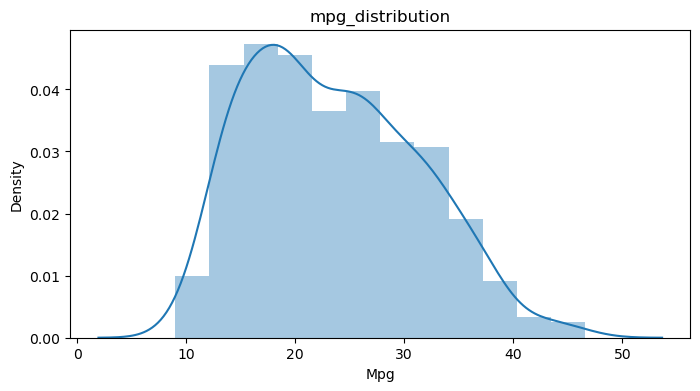

In [57]:
# 1. Mpg analysis
plt.figure(figsize = (8,4))
sns.distplot(df.Mpg)
plt.title("mpg_distribution")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\1.mpg_distribution.jpg", format = "jpg")
plt.show()

As we can see from the mpg distribution plot it is 'right-skewed' and we can conclude the following points from the above plot:
1. The majority of vehicles tends to have lower Mpg value while smaller number of vehiclses have higher mpg values.
2. Majority of the vehicles have an mpg value between 15 and 20.
3. Even if most vehicles have moderate fuel efficiency, there are few vehicles with exceptionally higher mpg.
4. The mean mpg is higher than the median of mpg


In [58]:
df.Mpg.mean()

23.505454545454548

In [59]:
df.Mpg.median()

23.0

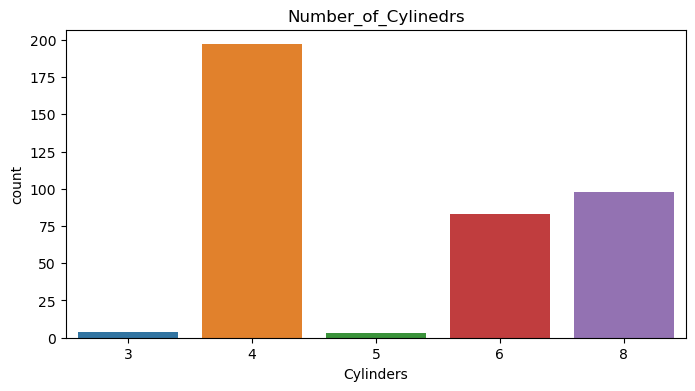

In [60]:
# 2. cylinders analysis
plt.figure(figsize = (8,4))
sns.countplot(data = df,x = df.Cylinders)
plt.title("Number_of_Cylinedrs")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\2.Number_of_Cylinedrs.jpg", format = "jpg")
plt.show()

We can draw the following points from the above bar plot for number of cylinders
1. The most common type of engine amont the vehicles in the dataset is 4 cylinders.
2. The 6 and 8 cylinder engines, which typically found in larger and more powerfull vehicles are the next most appearing type of cylinders in the dataset.
3. Very few vehicles consist the 3 and 5 cylinder configurations.

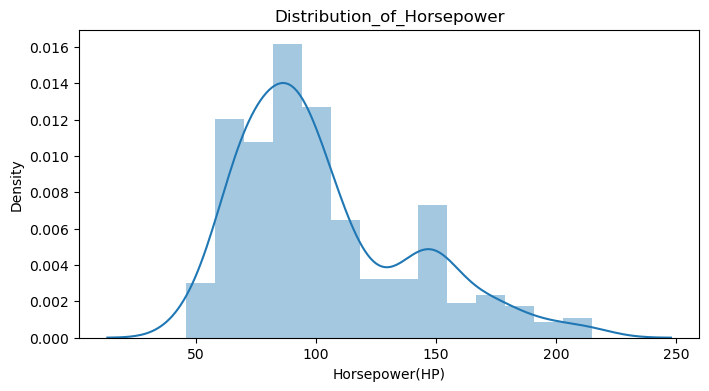

In [61]:
# 3. Horse Power analysis
plt.figure(figsize = (8,4))
sns.distplot(df['Horsepower(HP)'])
plt.title("Distribution_of_Horsepower")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\3.Distribution_of_Horsepower.jpg", format = "jpg")
plt.show()

In [62]:
df["Horsepower(HP)"].mean()

103.12727272727273

In [63]:
df["Horsepower(HP)"].median()

92.0

From the above density plot of horsepower we can conclude that:
1. The plot is "right skewed" means most of the vehicles have the horsepower less than that of the mean horsepower.
2. Most vehicles have horsepower between 85 and 95
3. The mean horsepower is greater than that of the median horsepower

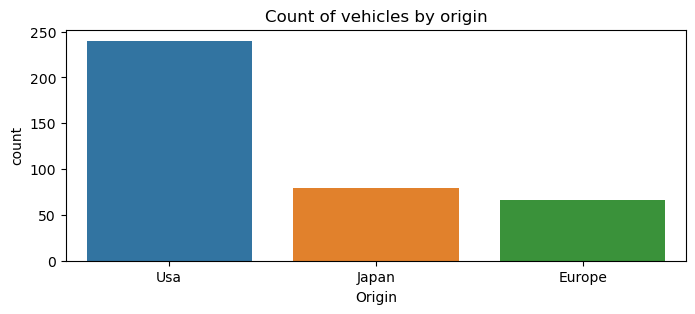

In [64]:
# 4. Origins Analysis
plt.figure(figsize = (8,3))
sns.countplot(data = df, x = df.Origin)
plt.title("Count of vehicles by origin")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\4.Count of vehicles by origin.jpg", format = "jpg")
plt.show()

From the above bar plot of origins we can conclude that:
1. Most of the vehicles are from usa.
2. Vehicles from japan and europe have almost equal numbers.

##### 5.2 Bivariate Analysis

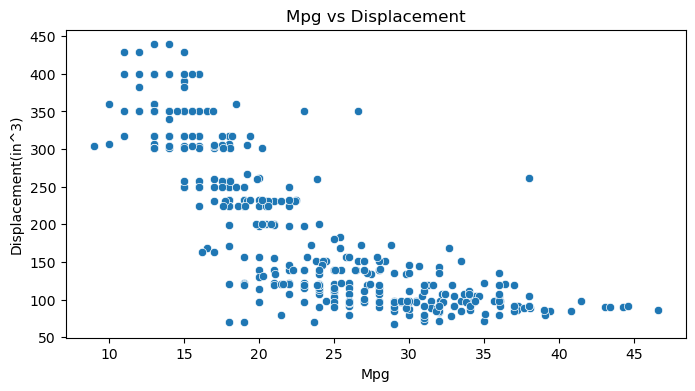

In [65]:
# 1. Mpg vs Displacement
plt.figure(figsize = (8,4))
sns.scatterplot(data = df, y = df["Displacement(in^3)"], x= df.Mpg)
plt.title("Mpg vs Displacement")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\5.Mpg vs Displacement.jpg", format = "jpg")
plt.show()

AS the mpg variable increases the engine displacement decreases. MEANS mpg and displacement have negative coorelation or inverse correlation.

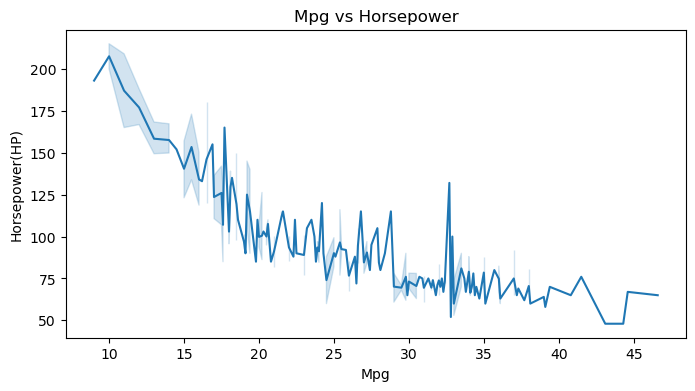

In [66]:
# 2. Mpg vs Horsepower
plt.figure(figsize = (8,4))
sns.lineplot(data = df, y = df["Horsepower(HP)"], x= df.Mpg)
plt.title("Mpg vs Horsepower")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\6. Mpg vs Horsepower.jpg", format = "jpg")
plt.show()

Vehicles with highest Horsepower have lower mpg and viceversa. MEANS mpg and horsepower also have negative correlation or inverse correlation.

<Figure size 800x400 with 0 Axes>

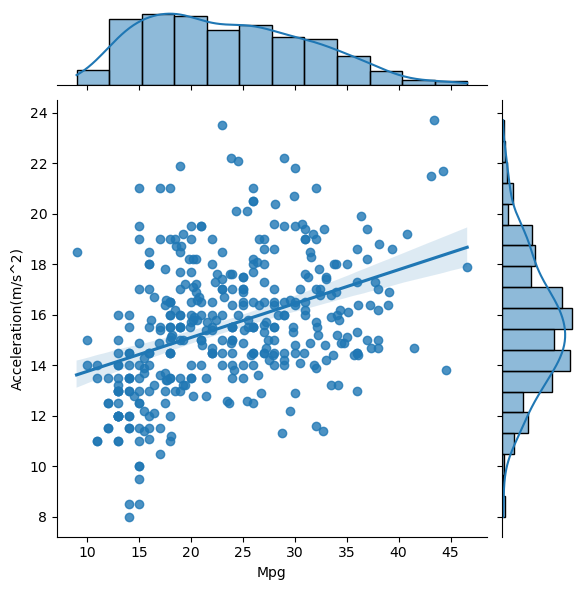

In [67]:
# 3. Mpg vs Acceleration
plt.figure(figsize = (8,4))
sns.jointplot(data = df, y = df['Acceleration(m/s^2)'], x= df.Mpg , kind = "reg")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\7. Mpg vs Acceleration.jpg", format = "jpg")
plt.show()

As the vehicles mpg increases the Acceleration also increases. mpg and acceleration have positive correlation.

<Figure size 800x400 with 0 Axes>

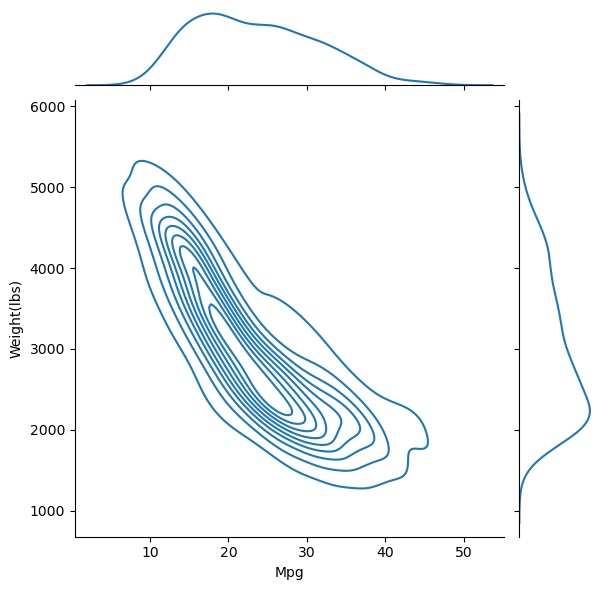

In [68]:
# 4. Mpg vs Weight
plt.figure(figsize = (8,4))
sns.jointplot(data = df, y = df["Weight(lbs)"], x= df.Mpg , kind = "kde")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\8. Mpg vs Weight.jpg", format = "jpg")
plt.show()

The majourity of the data lies in that region and the mpg have an inverse coorelation with the weight 

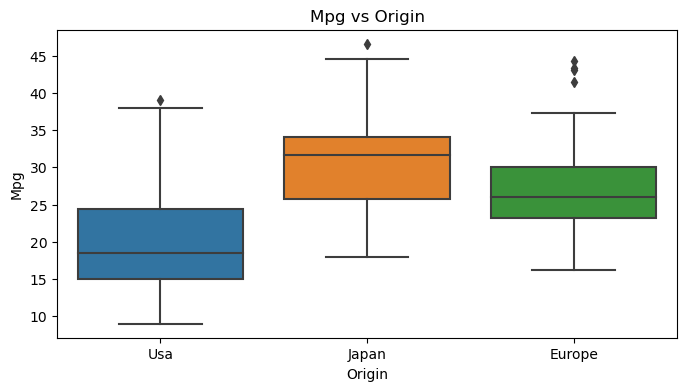

In [69]:
# 5. Mpg vs Origin
plt.figure(figsize = (8,4))
sns.boxplot(data = df, y =df.Mpg, x= df.Origin )
plt.title("Mpg vs Origin")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\9. Mpg vs Origin.jpg", format = "jpg")
plt.show()

From the above plot we can conclude that:
1. The median of mpg for vehicles from japan is greater than that of median of mpg(usa and europe)
2. The least mpg belongs to usa and the maximum mpg belongs to japan
3. More mpg outliers exist in europe.(evenif we set outliers as 3 standardeviations from the mean.)
4. The mpg of vehicles from europe falls around the mean compared to that of usa and japan.

##### 5.3 Multivariate Analysis

<Figure size 800x400 with 0 Axes>

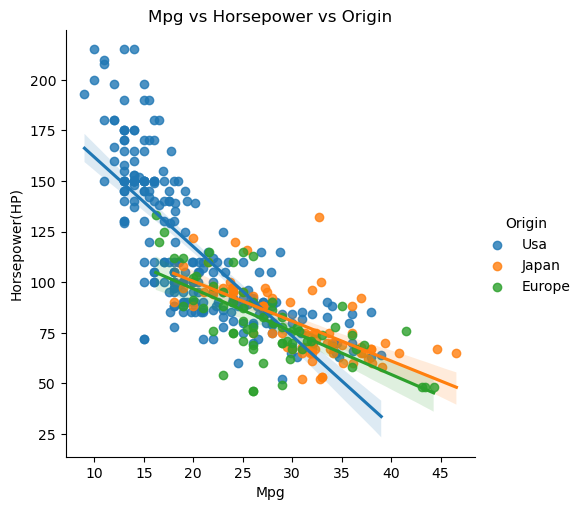

In [70]:
# 5. Mpg vs Horsepower vs Origin
plt.figure(figsize = (8,4))
sns.lmplot(data = df, x= "Mpg", y ="Horsepower(HP)", hue = "Origin")
plt.title("Mpg vs Horsepower vs Origin")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\10. Mpg vs Horsepower vs Origin.jpg", format = "jpg")
plt.show()

From the above linear model plot we can conclude that 
1. For all vehicles from the three regions as the mpg increaases the horsepower decreases.
2. The decrease in horsepower as the mpg increase is, more in vehicles from usa.
3. Vehicles from usa have highest amount of horsepower

<Figure size 800x400 with 0 Axes>

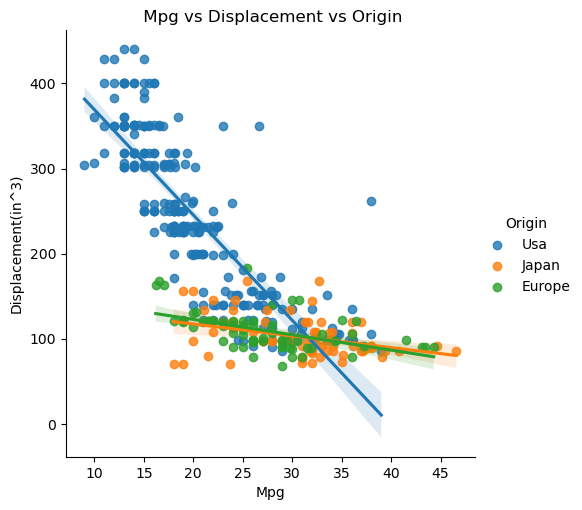

In [71]:
# 5. Mpg vs Displacement vs Origin
plt.figure(figsize = (8,4))
sns.lmplot(data = df, x= "Mpg", y ="Displacement(in^3)", hue = "Origin")
plt.title(" Mpg vs Displacement vs Origin")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\11. Mpg vs Displacement vs Origin.jpg", format = "jpg")
plt.show()

From the above linear model plot we can clearly see that
1. Vehicles with highest amount of engine displacement belongs to usa
2. For all vehicles from europe, japan and usa as mpg increases the engine displacement decreases.
3. The decrease in displacement for vehicles from usa is higher than the decrease in displacement for vehicles from japan and europe as mpg increases.

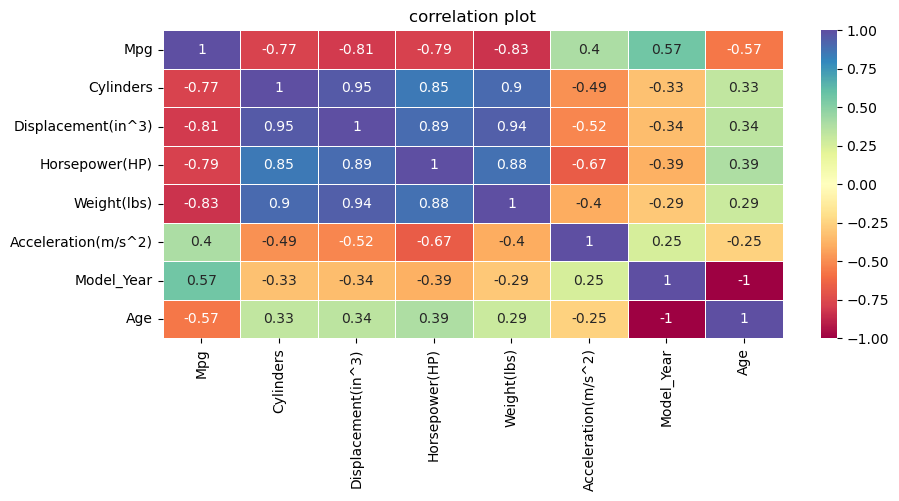

In [72]:
# correlation plot
plt.figure(figsize = (10,4))
sns.heatmap(df.select_dtypes(["int64","float64"]).corr(),annot = True, linewidth = 0.5,  cmap = "Spectral")
plt.title("correlation plot")
plt.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\12. correlation plot.jpg", format = "jpg")
plt.show()

As we can see from the above heatmap plot 
1. The acceleration have the least coorelation with the mpg so we have to remove it to prevent our model from overfitting.
2. The model year and age variables have same result so we have to remove one of them.
3. The displacement and cylinders variable are highly coorrelated, on the same way they are highly coorelated with the mpg variable so here we have to remove the displacement variable to prevent overfitting.

The name variable does not have any impact in our prediction analysis using linear regression model so we also remove the name variable form our dataframe

In [73]:
df.drop(["Model_Year","Acceleration(m/s^2)","Displacement(in^3)","Name"], axis = 1, inplace = True)

In [74]:
df.sample(4)

,Mpg,Cylinders,Horsepower(HP),Weight(lbs),Age,Origin
70,13.0,8,140.0,4294,52,Usa
219,20.5,6,105.0,3425,47,Usa
47,30.0,4,70.0,2074,53,Europe
144,31.0,4,67.0,2000,50,Europe


In [75]:
# here we have to assign the origin variables as a numbers 
df  = pd.get_dummies(df,dtype = "int",drop_first = True)

In [76]:
df.sample(3)

,Mpg,Cylinders,Horsepower(HP),Weight(lbs),Age,Origin_Japan,Origin_Usa
233,30.5,4,78.0,2190,47,0,0
66,13.0,8,190.0,4422,52,0,1
275,22.3,4,88.0,2890,45,0,1


### 6. Model Training

In [77]:
# now lets separate our target label and features
x = df.drop("Mpg",axis = 1) # features
y = df.Mpg    # target labels

In [78]:
# sample 3 records from the features
x.sample(3)

,Cylinders,Horsepower(HP),Weight(lbs),Age,Origin_Japan,Origin_Usa
260,4,95.0,2560,46,1,0
105,4,94.0,2379,51,1,0
245,6,105.0,3535,46,0,1


In [79]:
# sample 3 records form the label
y.sample(3)

372    32.0
31     17.0
149    16.0
Name: Mpg, dtype: float64

Now let's split our data in to training and testing sets using train test split module from scikit learn using 15% of our data for trianing and 85% for testing.

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size = 0.15)

In [81]:
# checking for shapes
x_train.shape

(327, 6)

In [82]:
# checking for shapes
x_test.shape

(58, 6)

In [83]:
# checking for shapes
y_train.shape

(327,)

In [84]:
# checking for shapes
y_test.shape

(58,)

In [85]:
# import a linear regression model
from sklearn.linear_model import LinearRegression

In [86]:
# assigning the linear regression model
mpg_model = LinearRegression()

In [87]:
# mpg_model
mpg_model

LinearRegression()

In [88]:
# Train the model using the training data
mpg_model.fit(x_train,y_train)

LinearRegression()

In [89]:
# Get the intercept (bias term) of the trained model (y_intercept)
mpg_model.intercept_

77.81278471085298

In [90]:
# Get the coefficients of the features from the trained model
mpg_model.coef_

array([ 0.21828635, -0.02035465, -0.00556287, -0.74149375,  0.19742985,
       -2.09617404])

In [91]:
# assigning the index for the coefficients
index_c = df.drop("Mpg",axis = 1).columns
index_c

Index(['Cylinders', 'Horsepower(HP)', 'Weight(lbs)', 'Age', 'Origin_Japan',
       'Origin_Usa'],
      dtype='object')

In [92]:
# data frame of coefficients
pd.DataFrame(mpg_model.coef_, index = index_c, columns = ["Coefficient_Values"])

,Coefficient_Values
Cylinders,0.218286
Horsepower(HP),-0.020355
Weight(lbs),-0.005563
Age,-0.741494
Origin_Japan,0.197430
Origin_Usa,-2.096174


### 7. Model Prediction

In [93]:
# Make predictions on the test data using the trained model and displaying predictions
prediction = mpg_model.predict(x_test)
prediction

array([25.00205938, 23.2288976 , 24.13662128, 29.72829852, 22.80478094,
       35.27894301, 17.40099127, 22.63572798, 29.19438184, 31.12447766,
       21.11564634, 15.60054156, 21.73870555, 30.00565427, 13.98767644,
       27.63682809, 12.21095202, 29.69099103, 32.20110258, 24.69357304,
       22.42967095,  8.30207957, 14.08911102, 18.93960742, 25.20258338,
       26.49040387, 20.60224831, 29.16454313, 15.28385156, 27.17193301,
       23.28079486,  7.17030891, 30.54174754, 24.41074138, 31.57706446,
       32.05313677, 15.50959489, 25.74487804, 30.41676877, 32.0653357 ,
       16.16667824, 24.65415538, 23.83351342, 20.97270446, 26.16737932,
        7.37336186, 17.17291376, 25.72521944,  8.93029919, 23.89864117,
       16.45922523, 21.53264794, 33.19693523, 29.77708473, 16.88297957,
       18.65346315, 28.12320132, 24.61294493])

In [94]:
# data frame of actual and predicted values
my_dict = {"actual": y_test, "prediction" : prediction}
pd.DataFrame(my_dict)

,actual,prediction
268,17.0,25.002059
250,19.4,23.228898
355,17.6,24.136621
332,30.0,29.728299
56,20.0,22.804781
373,38.0,35.278943
33,18.0,17.400991
114,19.0,22.635728
376,26.0,29.194382
238,36.1,31.124478


### 8. Model Evaluation

In [95]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
# defining a function for evaluation metrices
def metrics(actual,prediction):
    MAE = mean_absolute_error(actual,prediction)
    MSE = mean_squared_error(actual,prediction)
    R2_score = r2_score(actual,prediction)
    return MAE, MSE, R2_score

In [97]:
# assingning index and column names
index_name = ["MAE","MSE","R2_score"]
column_name = ["values"]

In [98]:
# data frame of evaluation metrices
pd.DataFrame(metrics(y_test,prediction), index = index_name, columns = column_name)

,values
MAE,2.672712
MSE,10.901380
R2_score,0.810825


### 9. Model Visualization

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

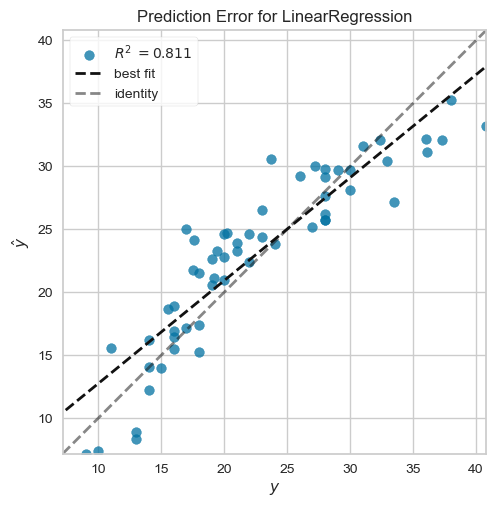

In [99]:
# Linear Regression model visualization using yellowbrick regressor
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(mpg_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\13. linear_regression_prediction_error.jpg", format='jpg')

Here are some key points and conclusions from the prediction error plot above

1. Goodness of Fit (( R^2 ) Value): The ( R^2) value is 0.821, indicating that approximately 82.1% of the variance in the target variable( y ) can be explained by the model. This suggests a strong correlation between the predicted values and the actual values, implying the model is performing well.

2. Prediction Accuracy: The scatter plot of the actual values versus the predicted values shows that most of the points are closely clustered around the diagonal line, which represents perfect predictions. This further indicates that the model's predictions are generally accurate.

3. Residuals and Error Analysis: The points deviating from the diagonal line represent prediction errors. While most points are near the line, some outliers are further away, indicating areas where the model's predictions are less accurate. These outliers could be investigated further to understand why the model is less accurate for these instances (e.g., potential anomalies or areas where the model might be underfitting or overfitting).

4. Line of Best Fit: The dashed line represents the line of best fit for the predicted versus actual values. Since this line is close to the identity line (the 45-degree diagonal), it further confirms that the model's predictions are in good agreement with the actual values.

5. Model Evaluation: Overall, the plot and the (R^2) value suggest that the linear regression model performs well for the given data. However, the presence of some outliers indicates there is room for improvement, possibly through further tuning of the model, feature engineering, or trying more complex models.

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

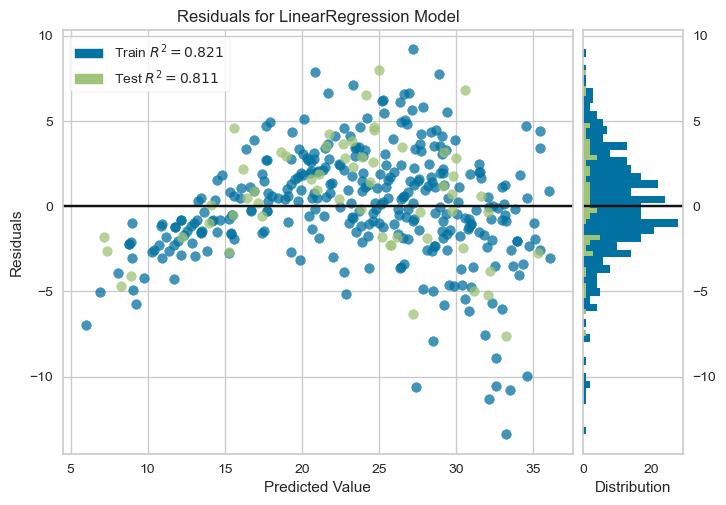

In [100]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(mpg_model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\14.linear_regression_Residual_plots.jpg", format = "jpg")

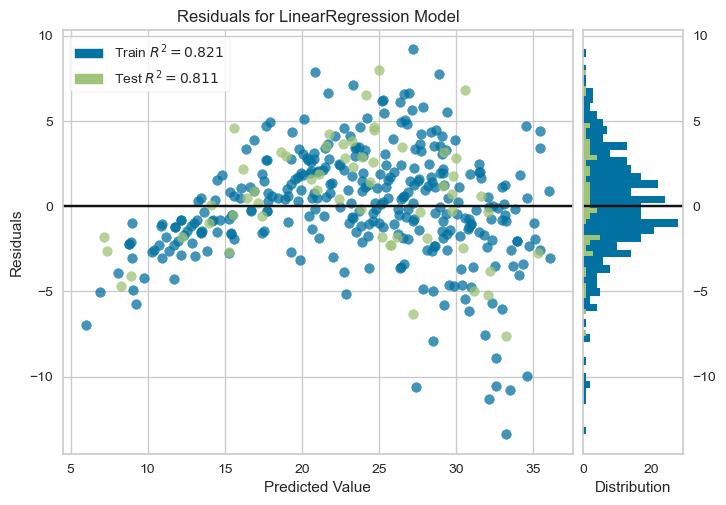

YellowbrickAttributeError: neither visualizer 'ResidualsPlot' nor wrapped estimator 'LinearRegression' have attribute 'savefig'

In [101]:
# Linear Regression model visualization using yellowbrick regressor
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(mpg_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show()
visualizer.savefig("C:\\Users\\yozil\\Desktop\\mpg_project\\plots\\14.linear_regression_Residual_plots.jpg", format='jpg')
plt.show()

Here are the main conclusions from the above residuals plot

1. Model Fit (R² values):
   - Both the training and test sets have an R² value of 0.821, indicating that the model explains 82.1% of the variance in the target variable for both sets. This suggests that the model has a good fit and is consistent across both datasets, indicating no overfitting.

2. Residual Distribution:
   - The residuals (the difference between the actual values and the predicted values) are plotted against the predicted values. For a good linear regression model, the residuals should be randomly scattered around the horizontal axis (residuals = 0) without any distinct pattern.
   - The residuals in this plot do not appear to show a strong pattern, suggesting that the model is capturing the underlying relationship between the features and the target variable reasonably well. However, there is some noticeable heteroscedasticity (variance of residuals increasing with predicted values), which might need further investigation.

3. Normality of Residuals:
   - The distribution of the residuals on the right-hand side histogram should ideally be normally distributed (bell-shaped). The histogram indicates that while the residuals are roughly centered around zero, their distribution is slightly skewed, which might suggest some non-normality in the residuals.

4. Outliers and Leverage Points:
   - There are a few points with high residuals (far from the horizontal axis) which might be outliers or high-leverage points. These points can have a disproportionate impact on the model's predictions and may need to be investigated further.

5. Bias:
   - The plot does not show a systematic bias (residuals are not consistently above or below the zero line) across the range of predicted values. This implies that the model does not systematically overestimate or underestimate the target variable.